### Exploring Customer Segmentation


<center>
    <img src = images/segments.jpeg>
</center>


In this activity, you are tasked with profiling customer groups for a large telecommunications company.  The data provided contains information on customers purchasing and useage behavior with the telecom products.  Your goal is to use PCA and clustering to segment these customers into meaningful groups, and report back your findings.  

Because these results need to be interpretable, it is important to keep the number of clusters reasonable.  Think about how you might represent some of the non-numeric features so that they can be included in your segmentation models.  You are to report back your approach and findings to the class.  Be specific about what features were used and how you interpret the resulting clusters.

In [51]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

In [52]:
df = pd.read_csv('data/telco_churn_data.csv')

In [53]:
df.head()

,Customer ID,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,...,Latitude,Longitude,Population,Churn Value,CLTV,Churn Category,Churn Reason,Total Customer Svc Requests,Product/Service Issues Reported,Customer Satisfaction
0,8779-QRDMV,No,0,1,NaN,No,0.00,No,Yes,Fiber Optic,...,34.023810,-118.156582,68701,1,5433,Competitor,Competitor offered more data,5,0,NaN
1,7495-OOKFY,Yes,1,8,Offer E,Yes,48.85,Yes,Yes,Cable,...,34.044271,-118.185237,55668,1,5302,Competitor,Competitor made better offer,5,0,NaN
2,1658-BYGOY,No,0,18,Offer D,Yes,11.33,Yes,Yes,Fiber Optic,...,34.108833,-118.229715,47534,1,3179,Competitor,Competitor made better offer,1,0,NaN
3,4598-XLKNJ,Yes,1,25,Offer C,Yes,19.76,No,Yes,Fiber Optic,...,33.936291,-118.332639,27778,1,5337,Dissatisfaction,Limited range of services,1,1,2.0
4,4846-WHAFZ,Yes,1,37,Offer C,Yes,6.33,Yes,Yes,Cable,...,33.972119,-118.020188,26265,1,2793,Price,Extra data charges,1,0,2.0


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 46 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Referred a Friend                  7043 non-null   object 
 2   Number of Referrals                7043 non-null   int64  
 3   Tenure in Months                   7043 non-null   int64  
 4   Offer                              3166 non-null   object 
 5   Phone Service                      7043 non-null   object 
 6   Avg Monthly Long Distance Charges  7043 non-null   float64
 7   Multiple Lines                     7043 non-null   object 
 8   Internet Service                   7043 non-null   object 
 9   Internet Type                      5517 non-null   object 
 10  Avg Monthly GB Download            7043 non-null   int64  
 11  Online Security                    7043 non-null   objec

In [55]:
df.describe()

,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Regular Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Age,Number of Dependents,Zip Code,Latitude,Longitude,Population,Churn Value,CLTV,Total Customer Svc Requests,Product/Service Issues Reported,Customer Satisfaction
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,1834.000000
mean,1.951867,32.386767,22.958954,21.110890,65.538800,2280.381264,1.962182,278.499225,749.099262,46.509726,0.468692,93486.070567,36.197455,-119.756684,22139.603294,0.265370,4400.295755,1.338776,0.308107,3.005453
std,3.001199,24.542061,15.448113,20.948471,30.606805,2266.220462,7.902614,685.039625,846.660055,16.750352,0.962802,1856.767505,2.468929,2.154425,21152.392837,0.441561,1183.057152,1.430471,0.717514,1.256938
min,0.000000,1.000000,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000,19.000000,0.000000,90001.000000,32.555828,-124.301372,11.000000,0.000000,2003.000000,0.000000,0.000000,1.000000
25%,0.000000,9.000000,9.210000,3.000000,35.890000,400.150000,0.000000,0.000000,70.545000,32.000000,0.000000,92101.000000,33.990646,-121.788090,2344.000000,0.000000,3469.000000,0.000000,0.000000,2.000000
50%,0.000000,29.000000,22.890000,17.000000,71.968000,1394.550000,0.000000,0.000000,401.440000,46.000000,0.000000,93518.000000,36.205465,-119.595293,17554.000000,0.000000,4527.000000,1.000000,0.000000,3.000000
75%,3.000000,55.000000,36.395000,28.000000,90.650000,3786.600000,0.000000,182.620000,1191.100000,60.000000,0.000000,95329.000000,38.161321,-117.969795,36125.000000,1.000000,5380.500000,2.000000,0.000000,4.000000
max,11.000000,72.000000,49.990000,94.000000,123.084000,8684.800000,49.790000,6477.000000,3564.720000,80.000000,9.000000,96150.000000,41.962127,-114.192901,105285.000000,1.000000,6500.000000,9.000000,6.000000,5.000000


In [56]:
# Convert boolean dtypes to numerics - either 0 or 1
order = {'Yes': 1, 'No': 0}
df['Referred a Friend'] = df['Referred a Friend'].map(order)
df['Phone Service'] = df['Phone Service'].map(order)
df['Multiple Lines'] = df['Multiple Lines'].map(order)
df['Internet Service'] = df['Internet Service'].map(order)

#Drop all object dtypes
df['Customer Satisfaction'] = df['Customer Satisfaction'].fillna(0)
object_cols = df.select_dtypes('object').columns.tolist()
df_numeric = df.drop(object_cols, axis = 1)  

#Standardize the data
df_Standardized = StandardScaler().fit_transform(df_numeric) 
df_Standardized = pd.DataFrame(StandardScaler().fit_transform(df_numeric), columns=df_numeric.columns) 

#Perform PCA
pca_3D = PCA(n_components=4, random_state=42) 
components_3D = pca_3D.fit_transform(df_Standardized)  

#Cluster creation using K-Means
kmeans = KMeans(n_clusters=3, random_state=42).fit(components_3D) 
cluster_labels = kmeans.labels_

df_Standardized['Cluster'] = cluster_labels
print(df_Standardized['Cluster'].value_counts()) 

Cluster
1    3153
2    2270
0    1620
Name: count, dtype: int64


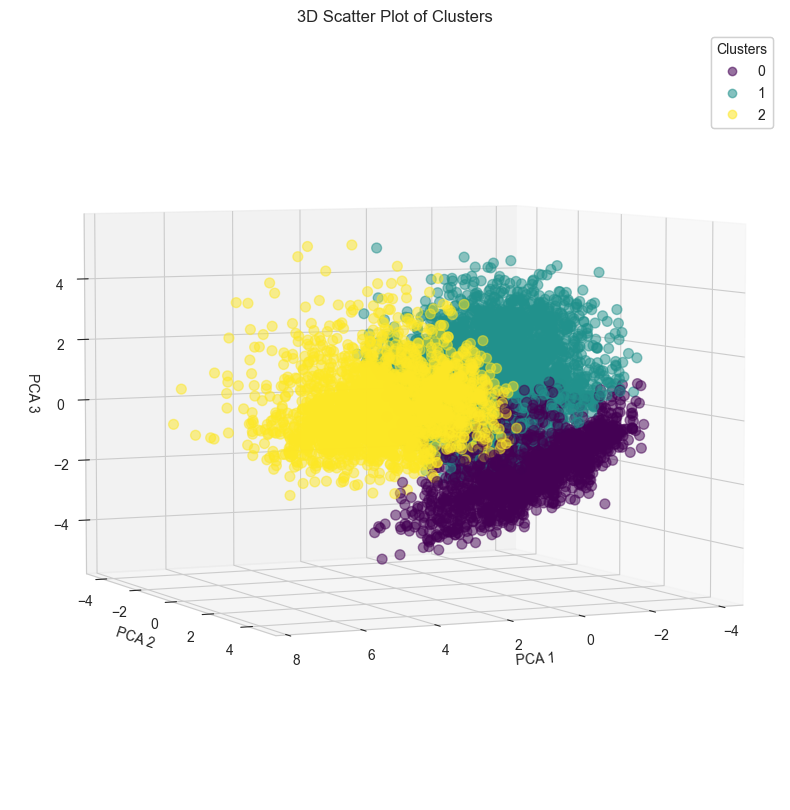

In [57]:
# Creating a 3D scatter plot of the clusters
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of your components with cluster labels determining the color
scatter = ax.scatter(components_3D[:, 0], components_3D[:, 1], components_3D[:, 2], c=cluster_labels, cmap='viridis', s=50, alpha=0.5)

# Title and labels
ax.set_title('3D Scatter Plot of Clusters')
ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_zlabel('PCA 3')

# Legend
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)
ax.view_init(elev=5, azim=65)
plt.show()

In [58]:
df_numeric.head()

,Referred a Friend,Number of Referrals,Tenure in Months,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Avg Monthly GB Download,Monthly Charge,Total Regular Charges,...,Number of Dependents,Zip Code,Latitude,Longitude,Population,Churn Value,CLTV,Total Customer Svc Requests,Product/Service Issues Reported,Customer Satisfaction
0,0,0,1,0,0.00,0,1,9,41.236,39.65,...,0,90022,34.023810,-118.156582,68701,1,5433,5,0,0.0
1,1,1,8,1,48.85,1,1,19,83.876,633.30,...,1,90063,34.044271,-118.185237,55668,1,5302,5,0,0.0
2,0,0,18,1,11.33,1,1,57,99.268,1752.55,...,3,90065,34.108833,-118.229715,47534,1,3179,1,0,0.0
3,1,1,25,1,19.76,0,1,13,102.440,2514.50,...,1,90303,33.936291,-118.332639,27778,1,5337,1,1,2.0
4,1,1,37,1,6.33,1,1,15,79.560,2868.15,...,1,90602,33.972119,-118.020188,26265,1,2793,1,0,2.0


Text(0.5, 1.0, 'Phone Service & PCA')

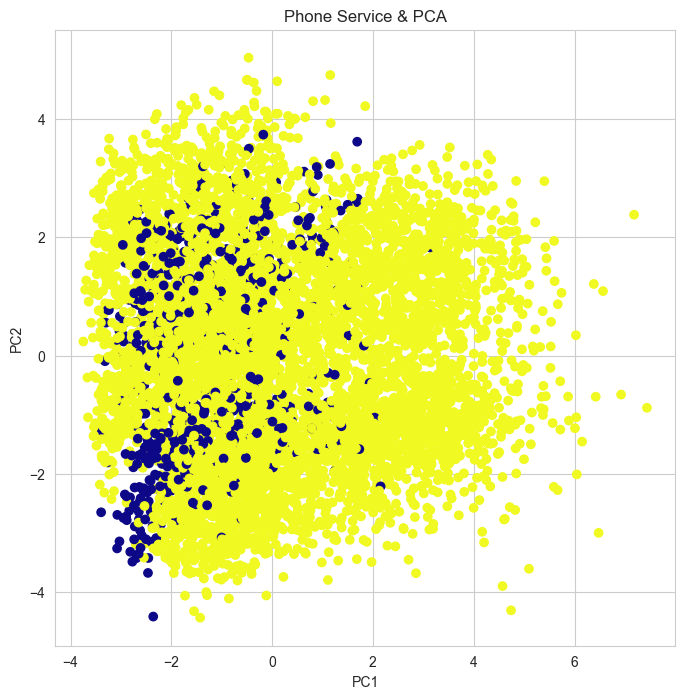

In [59]:
# Perform PCA
pca_2d = PCA(n_components=2)
components_2D = pca_2d.fit_transform(df_Standardized)

plt.figure(figsize=(8, 8))
scatter = plt.scatter(components_2D[:, 0], components_2D[:, 1], c=df_numeric['Phone Service'], cmap='plasma')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Phone Service & PCA') 

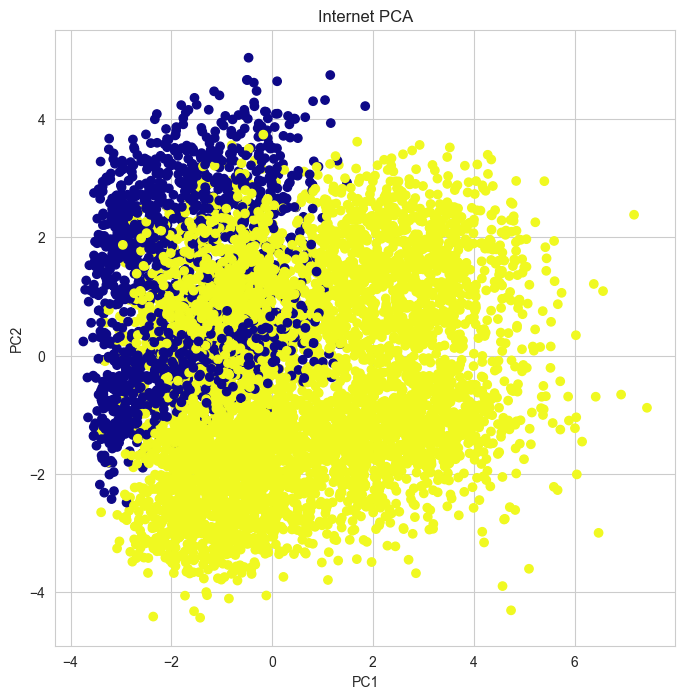

In [60]:
# Perform PCA
pca_2d = PCA(n_components=2)
components_2D = pca_2d.fit_transform(df_Standardized)

plt.figure(figsize=(8, 8))
scatter = plt.scatter(components_2D[:, 0], components_2D[:, 1], c=df_numeric['Internet Service'], cmap='plasma')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Internet PCA')
plt.savefig('./Multiple_Lines.png',bbox_inches = 'tight')